# Introduction and flat files

In [2]:
import numpy as np
import pandas as pd

In [6]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = r'.\data\titanic_sub.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Assign the filename: file
file = r'.\data\mnis.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.to_numpy()

# Print the datatype of data_array to the shell
display(type(data_array))

numpy.ndarray

In [5]:
file = r'.\data\titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(
    file,
    sep='\t'
)

data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Nothing,S #dfafdad
1,2,1,1,female,38.0,1,0,PC 17599#to,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,NaN,NaN,NaN
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,male,35.0,0,0,373450,8.050,NaN,S


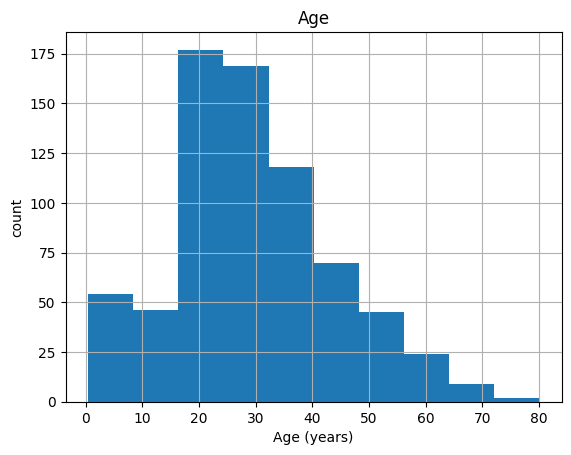

In [8]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = r'.\data\titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(
    file,
    sep='\t',
    comment='#',
    na_values=['NA', np.nan, 'Nothing']
)

# Print the head of the DataFrame
display(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

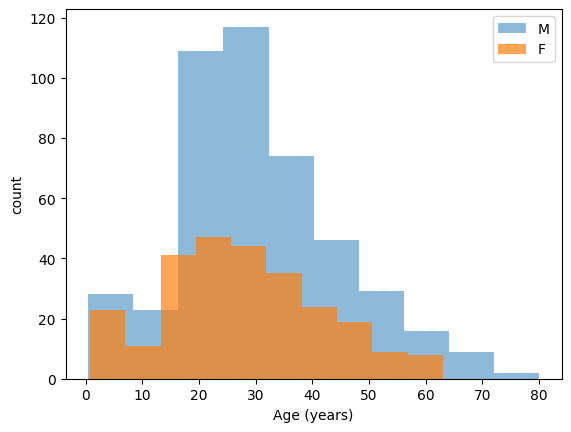

In [18]:
plt.hist(data[data['Sex']=='male'][['Age']], label='M', alpha=0.5)
plt.hist(data[data['Sex']=='female'][['Age']], label='F', alpha=0.7)
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()

# Importing data from other file types

In [23]:
import pickle

with open(r'.\data\data.pkl', 'wb') as file:
    pickle.dump(d, file, protocol=pickle.HIGHEST_PROTOCOL)
# d = {'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
# pd.DataFrame(d).reset_index().to_pickle()

In [25]:
# Import pickle package
import pickle

# Open pickle file and load data: d
with open(r'.\data\data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

{'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
<class 'dict'>


In [21]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = r'.\data\battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


In [22]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
display(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
display(df2.head())

,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277
3,Andorra,0.000000
4,Angola,2.597931


,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


In [26]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(
    0
    , skiprows=1
    , names=['Country', 'AAM due to War (2002)']
)

# Print the head of the DataFrame df1
display(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(
    1
    , usecols=[0]
    , skiprows=1
    , names=['Country']
)

# Print the head of the DataFrame df2
display(df2.head())

,Country,AAM due to War (2002)
0,Albania,0.128908
1,Algeria,18.314120
2,Andorra,0.000000
3,Angola,18.964560
4,Antigua and Barbuda,0.000000


,Country
0,Albania
1,Algeria
2,Andorra
3,Angola
4,Antigua and Barbuda


# Working with relational databases in Python

In [35]:
# Import necessary module
import pandas as pd
from sqlalchemy import create_engine, inspect, text
import os
dir_ = r'.\data\\'
db_ = 'Chinook.sqlite'
path_ = os.path.join(dir_, db_)
# path_ = r'C:\Users\anshu\OneDrive\Code\Python\Python\Data_Engineering\Associate Data Engineer _ DataCamp\04 - Introduction to Importing Data in Python\Data\Chinook.sqlite'

# Create engine: engine
engine = create_engine(f'sqlite:///{path_}')

In [36]:
# Save the table names to a list: table_names
inspector = inspect(engine)
table_names = inspector.get_table_names()

# Print the table names to the shell
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [37]:
con = engine.connect()
rs = con.execute(text("SELECT * FROM Album"))
con.close()

In [38]:
pd.DataFrame(rs.fetchall())

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [40]:
rs.keys()

RMKeyView(['AlbumId', 'Title', 'ArtistId'])

In [44]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
engine = create_engine(f'sqlite:///{path_}')
with engine.connect() as con:
    # rs = con.execute(text('SELECT LastName, Title FROM Employee'))
    qry = 'Select LastName, Title FROM Employee'
    rs = con.execute(text(qry))
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


In [46]:
with engine.connect() as con:
    rs = con.execute(text('SELECT * FROM Employee WHERE EmployeeId >= 6'))
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
display(df.head())

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
1,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
2,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [47]:
# Open engine in context manager
with engine.connect() as con:
    rs = con.execute(text('SELECT * FROM Employee ORDER BY BirthDate'))
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
display(df.head())

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [48]:
pd.read_sql_query('SELECT * FROM Employee ORDER BY BirthDate', engine)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
5,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
6,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
7,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com


In [49]:
pd.read_sql_query('SELECT * FROM Album', engine).head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [50]:
pd.read_sql_query('SELECT * FROM Artist', engine).head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [51]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute(text('''
    SELECT
            alb.Title, art.Name
        FROM
            Album AS alb
            INNER JOIN
                Artist AS art
                    on alb.ArtistId = art.ArtistId
    '''))
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())


                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


In [52]:
pd.read_sql_query('SELECT * FROM PlaylistTrack', engine).head()

,PlaylistId,TrackId
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392


In [53]:
pd.read_sql_query('SELECT * FROM Track', engine).head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [55]:
# Execute query and store records in DataFrame: df
qry = '''
    SELECT
            *
        FROM
            PlaylistTrack  AS plt
            INNER JOIN
                Track AS trk
                on plt.TrackId = trk.TrackId
        WHERE
            trk.Milliseconds < 250000
    '''
df = pd.read_sql_query(qry, engine)

# Print head of DataFrame
display(df.head())

,PlaylistId,TrackId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,3390,3390,One and the Same,271,2,23,None,217732,3559040,0.99
1,1,3392,3392,Until We Fall,271,2,23,None,230758,3766605,0.99
2,1,3393,3393,Original Fire,271,2,23,None,218916,3577821,0.99
3,1,3394,3394,Broken City,271,2,23,None,228366,3728955,0.99
4,1,3395,3395,Somedays,271,2,23,None,213831,3497176,0.99
